In [1]:
import numpy as np 
import pandas as pd 
import pandas_datareader.data as web 
import matplotlib.pyplot as plt

In [2]:
goog = web.DataReader('GOOG', data_source='yahoo', start='8/14/2007', end='8/14/2019')

In [3]:
type(goog)

pandas.core.frame.DataFrame

In [4]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-08-13,258.904572,255.557114,258.799957,256.787506,6382300.0,256.787506
2007-08-14,257.733948,253.051498,256.897095,253.350388,7294500.0,253.350388
2007-08-15,254.889618,247.427582,253.549637,247.846008,10859500.0,247.846008
2007-08-16,247.288101,239.332916,245.091339,244.842270,17355900.0,244.842270
2007-08-17,249.564575,244.907028,247.791214,249.086365,10999800.0,249.086365


In [5]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-08,1205.010010,1173.020020,1182.829956,1204.800049,1468000.0,1204.800049
2019-08-09,1203.880005,1183.603027,1197.989990,1188.010010,1065700.0,1188.010010
2019-08-12,1184.959961,1167.671997,1179.209961,1174.709961,1003000.0,1174.709961
2019-08-13,1204.780029,1171.459961,1171.459961,1197.270020,1294400.0,1197.270020
2019-08-14,1182.300049,1160.540039,1176.310059,1164.290039,1578700.0,1164.290039


In [6]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1)) 

In [7]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret
Date,,,,,,,
2007-08-13,258.904572,255.557114,258.799957,256.787506,6382300.0,256.787506,NaN
2007-08-14,257.733948,253.051498,256.897095,253.350388,7294500.0,253.350388,-0.013475
2007-08-15,254.889618,247.427582,253.549637,247.846008,10859500.0,247.846008,-0.021966
2007-08-16,247.288101,239.332916,245.091339,244.842270,17355900.0,244.842270,-0.012193
2007-08-17,249.564575,244.907028,247.791214,249.086365,10999800.0,249.086365,0.017185


In [8]:
vola = np.sqrt(np.sum(np.square(goog['Log_Ret']))/(len(goog['Log_Ret'])-1)*252) # annulized vol
print('Volatility = ' + str(vola)) 

Volatility = 0.2893679861483999


In [9]:
goog['Volatility'] = pd.Series(goog['Log_Ret']).rolling(window=252,center=False).std() * np.sqrt(252)

In [10]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2019-08-08,1205.010010,1173.020020,1182.829956,1204.800049,1468000.0,1204.800049,0.025905,0.288851
2019-08-09,1203.880005,1183.603027,1197.989990,1188.010010,1065700.0,1188.010010,-0.014034,0.289171
2019-08-12,1184.959961,1167.671997,1179.209961,1174.709961,1003000.0,1174.709961,-0.011258,0.289367
2019-08-13,1204.780029,1171.459961,1171.459961,1197.270020,1294400.0,1197.270020,0.019023,0.289864
2019-08-14,1182.300049,1160.540039,1176.310059,1164.290039,1578700.0,1164.290039,-0.027932,0.291188


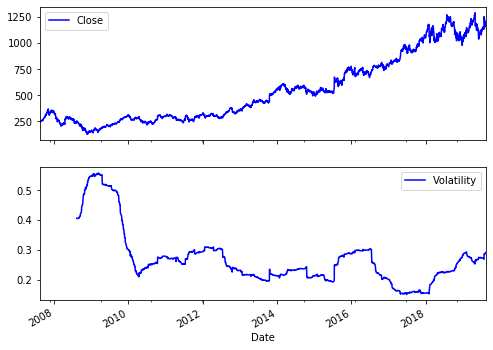

In [11]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))
plt.show()

In [12]:
goog

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2007-08-13,258.904572,255.557114,258.799957,256.787506,6382300.0,256.787506,NaN,NaN
2007-08-14,257.733948,253.051498,256.897095,253.350388,7294500.0,253.350388,-0.013475,NaN
2007-08-15,254.889618,247.427582,253.549637,247.846008,10859500.0,247.846008,-0.021966,NaN
2007-08-16,247.288101,239.332916,245.091339,244.842270,17355900.0,244.842270,-0.012193,NaN
2007-08-17,249.564575,244.907028,247.791214,249.086365,10999800.0,249.086365,0.017185,NaN
2007-08-20,250.341660,247.073914,250.291840,248.030319,5414700.0,248.030319,-0.004249,NaN
2007-08-21,253.131195,247.955597,248.538422,252.359100,7248200.0,252.359100,0.017302,NaN
2007-08-22,257.161102,253.674164,254.027847,255.417633,6529700.0,255.417633,0.012047,NaN
2007-08-23,257.101318,252.553375,257.036560,255.138672,6176400.0,255.138672,-0.001093,NaN
